In [1]:
# importing libraries for reading the dataset

# PANDAS and NUMPY

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cardatafinal.csv')

In [4]:
df

,Unnamed: 0,Car,Place,Kms,Price
0,0,Tata Tiago,Rohini Sector 7\nJan 20,"2017 - 52,000 km","₹ 3,35,000"
1,1,Honda Amaze,Rohini Sector 7\nMay 28,2016 - 55000.0 km,"₹ 4,00,000"
2,2,Hyundai Creta,Tilak Nagar\nJan 14,"2018 - 43,950 km","₹ 8,99,000"
3,3,Maruti Suzuki Ritz,Kamaruddin Nagar\nToday,"2011 - 110,000 km","₹ 2,00,000"
4,4,Maruti Suzuki Vitara-Brezza,Pitampura\nToday,"2018 - 32,500 km","₹ 7,39,000"
...,...,...,...,...,...
5068,1068,Fiat Linea,Karol Bagh\n4 days ago,"2014 - 50,000 km","₹ 3,20,000"
5069,1069,Fiat Linea,Haqikat Nagar\n4 days ago,"2010 - 80,000 km","₹ 1,85,000"
5070,1070,Fiat Linea,Ashok Vihar\n5 days ago,"2009 - 78,000 km","₹ 95,000"
5071,1071,Fiat Avventura,Mangolpuri\n6 days ago,"2015 - 84,000 km","₹ 3,45,000"


In [5]:
# Dropping a column, its a nominal data column

In [6]:
df = df.drop(columns='Unnamed: 0')

In [7]:
# checking the null values in dataset

In [8]:
df.isna().sum()

Car      80
Place    80
Kms      40
Price     0
dtype: int64

In [9]:
# a few nulls are present in dataset

In [10]:
# checking the datatype

In [11]:
df.dtypes

Car      object
Place    object
Kms      object
Price    object
dtype: object

In [12]:
# whole dataset is present as object datatype

In [13]:
# first we import encoder for encoding the columns

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lab_enc = LabelEncoder()

In [16]:
# dropping the nulls and encoding the columns individually

In [17]:
df['Car'] = df['Car'].dropna()

In [18]:
df['Car'] = lab_enc.fit_transform(df['Car'])

In [19]:
df['Place'] = df['Place'].dropna()

In [20]:
df['Place'] = lab_enc.fit_transform(df['Place'])

In [21]:
df['Kms'] = df['Kms'].dropna()

In [22]:
df['Kms'] = lab_enc.fit_transform(df['Kms'])

In [23]:
df['Price'] = lab_enc.fit_transform(df['Price'])

In [24]:
# we have encoded our dataset

In [25]:
df

,Car,Place,Kms,Price
0,267,1165,1490,469
1,70,1167,1309,565
2,87,1569,1681,900
3,171,542,267,287
4,181,1003,1647,825
...,...,...,...,...
5068,56,553,837,460
5069,56,420,236,63
5070,56,73,137,951
5071,52,739,1168,472


In [26]:
# checking one more time for nulls

In [27]:
df.isna().sum()

Car      0
Place    0
Kms      0
Price    0
dtype: int64

In [28]:
df.describe()

,Car,Place,Kms,Price
count,5073.000000,5073.000000,5073.000000,5073.000000
mean,151.260004,848.922334,1220.147053,453.226099
std,88.955395,509.560658,656.515004,263.638892
min,0.000000,0.000000,0.000000,0.000000
25%,75.000000,383.000000,681.000000,234.000000
50%,136.000000,946.000000,1200.000000,460.000000
75%,230.000000,1200.000000,1786.000000,670.000000
max,310.000000,1733.000000,2357.000000,961.000000


In [29]:
# checking once again for datatype

In [30]:
df.dtypes

Car      int32
Place    int32
Kms      int32
Price    int32
dtype: object

In [31]:
# after encoding, our data now present in 'int' form

In [32]:
# importing visualisation libraries

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# first distribution plot

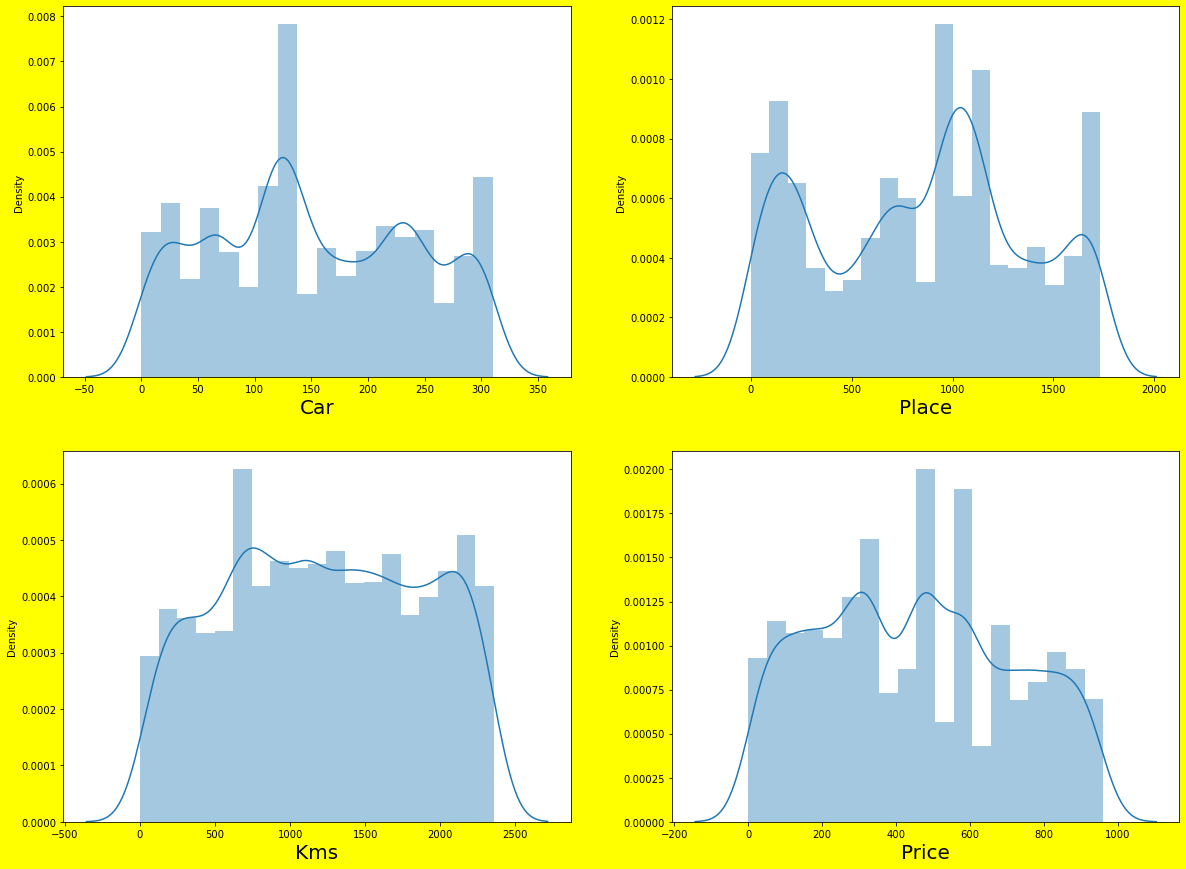

In [35]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=5:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [36]:
# columns are shown in plot, looking as in normal shape

In [37]:
# let's check for outliers 

In [38]:
# second boxplot

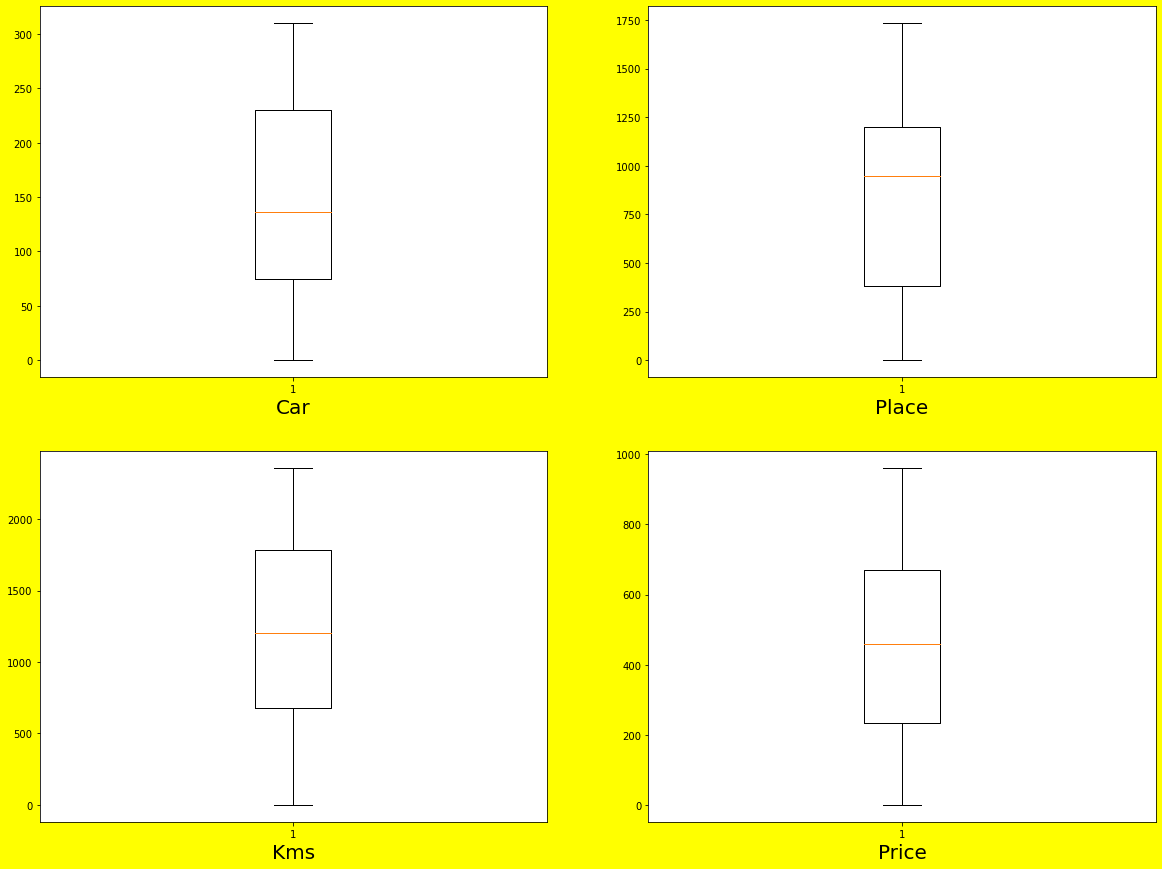

In [39]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=5:
        ax = plt.subplot(2,2,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [40]:
# as by boxplot, no outliers are shown in dataset

In [41]:
# ok, let's check for outliers individually by using Quantiles

In [42]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [43]:
print(q1)

Car       75.0
Place    383.0
Kms      681.0
Price    234.0
Name: 0.25, dtype: float64


In [44]:
print(q3)

Car       230.0
Place    1200.0
Kms      1786.0
Price     670.0
Name: 0.75, dtype: float64


In [45]:
print(iqr)

Car       155.0
Place     817.0
Kms      1105.0
Price     436.0
dtype: float64


In [46]:
car_high = (q3.Car + (1.5 * iqr.Car))
car_high

462.5

In [47]:
index = np.where(df['Car'] > car_high)
index

(array([], dtype=int64),)

In [48]:
car_low = (q1.Car - (1.5 * iqr.Car))
car_low

-157.5

In [49]:
index = np.where(df['Car'] < car_low)
index

(array([], dtype=int64),)

In [50]:
place_high = (q3.Place + (1.5 * iqr.Place))
place_high

2425.5

In [51]:
index = np.where(df['Place'] > place_high)
index

(array([], dtype=int64),)

In [52]:
place_low = (q1.Place - (1.5 * iqr.Place))
place_low

-842.5

In [53]:
index = np.where(df['Place'] < place_low)
index

(array([], dtype=int64),)

In [54]:
kms_high = (q3.Kms + (1.5 * iqr.Kms))
kms_high

3443.5

In [55]:
index = np.where(df['Kms'] > kms_high)
index

(array([], dtype=int64),)

In [56]:
kms_low = (q1.Kms - (1.5 * iqr.Kms))
kms_low

-976.5

In [57]:
index = np.where(df['Kms'] < kms_low)
index

(array([], dtype=int64),)

In [58]:
# no outliers are shown 

In [59]:
# now, will plot heatmap, checking multicollinearity problem

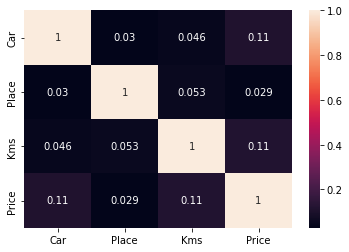

In [60]:
corr = df.corr().abs()

sns.heatmap(corr, annot=True)

plt.show()

In [61]:
# no columns are related to each other 

In [62]:
# split the data set into two variable for further process

In [63]:
x = df.drop(columns='Price')
y = df['Price']

In [64]:
# let's plot one more plot 'Scatterplot', to have a look how data is scatterd

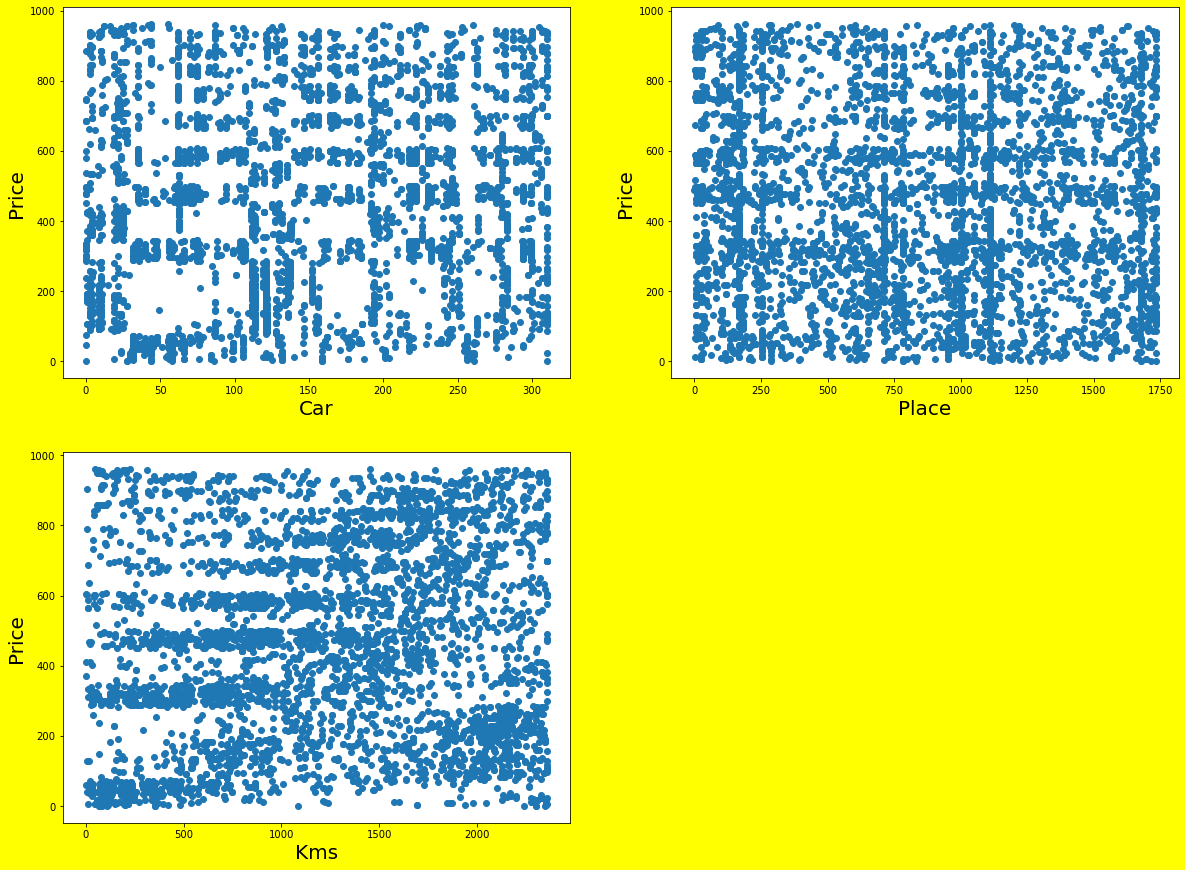

In [65]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=5:
        ax = plt.subplot(2,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [66]:
# data is throughly scattered

In [67]:
# Now importing standardscaler to standardize the data 

# train_test_split

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=40)

In [71]:
# importing metrics for checking the error of model

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [73]:
# first model Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [76]:
lr_pred = lr.predict(x_test)

In [77]:
lr.score(x_train,y_train)

0.029107292365083026

In [78]:
lr.score(x_test,y_test)

0.012872350676090272

In [79]:
# Linear Regression is giving a very low score on data

In [80]:
# plotting the scatter plot for predicted data and actual data

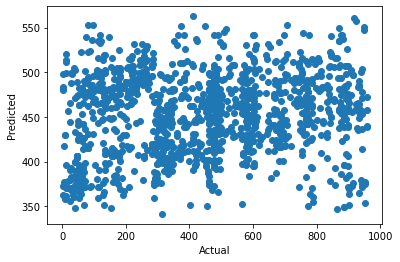

In [81]:
plt.scatter(y_test,lr_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [82]:
mean_absolute_error(y_test,lr_pred)

224.34454218544911

In [83]:
mean_squared_error(y_test,lr_pred)

69927.33567483806

In [84]:
np.sqrt(mean_squared_error(y_test,lr_pred))

264.4377727837649

In [85]:
# these are the error measured by different metrics

In [86]:
# second model Decision Tree

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
dt_pred = dt.predict(x_test)

In [90]:
dt.score(x_train,y_train)

0.9904518723264373

In [91]:
dt.score(x_test,y_test)

0.1931203462553649

In [92]:
# it gives good accuracy on train data but very low accuracy on test data

In [93]:
# plotting scatter for actual and predicted data for decision tree

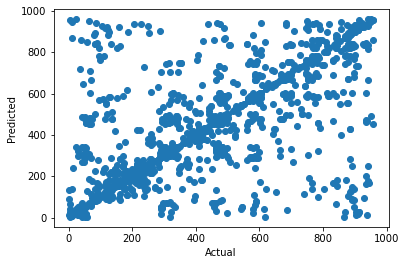

In [94]:
plt.scatter(y_test,dt_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [95]:
mean_absolute_error(y_test,dt_pred)

132.22898381384564

In [96]:
mean_squared_error(y_test,dt_pred)

57158.71137359252

In [97]:
np.sqrt(mean_squared_error(y_test,dt_pred))

239.07888106981036

In [98]:
# these are the errors measured by differnet metrics for decision tree

In [99]:
# third model Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor()

In [102]:
rf_pred = rf.predict(x_test)

In [103]:
rf.score(x_train,y_train)

0.9227386494649623

In [104]:
rf.score(x_test,y_test)

0.4679376315823054

In [105]:
# it gives a good accuracy on train data and some good accuracy on test data

In [106]:
# plotting scatterplot for actual and predicted data of random forest

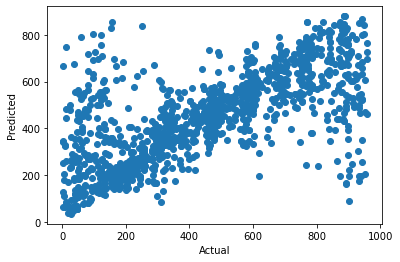

In [107]:
plt.scatter(y_test,rf_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [108]:
# more data points are near to each other of actual and predicted data

In [109]:
mean_absolute_error(y_test,rf_pred)

125.23429695373883

In [110]:
mean_squared_error(y_test,rf_pred)

37690.8739834974

In [111]:
np.sqrt(mean_squared_error(y_test,rf_pred))

194.1413762789823

In [112]:
# these are the errors measured by different metrics of Random Forest

In [113]:
# fourth model SVM

In [114]:
from sklearn.svm import SVR

In [115]:
svr = SVR()

svr.fit(x_train,y_train)

SVR()

In [116]:
svr_pred = svr.predict(x_test)

In [117]:
svr.score(x_train,y_train)

0.06730532636945485

In [118]:
svr.score(x_test,y_test)

0.061610034161124205

In [119]:
# a very low accuracy is given by this model on both training and test data

In [120]:
# scatter plot for actual and oredicted data 

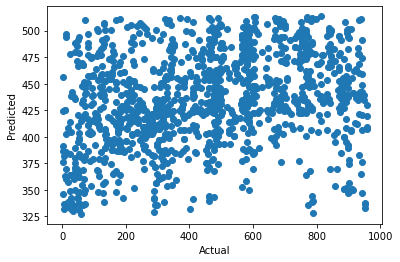

In [121]:
plt.scatter(y_test,svr_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [122]:
mean_absolute_error(y_test,svr_pred)

216.0320345119991

In [123]:
mean_squared_error(y_test,svr_pred)

66474.79703365402

In [124]:
np.sqrt(mean_squared_error(y_test,svr_pred))

257.8270680779154

In [125]:
# these are the errors measured 

In [126]:
# fifth model Ada Boost

In [127]:
from sklearn.ensemble import AdaBoostRegressor

In [128]:
ada = AdaBoostRegressor()

ada.fit(x_train,y_train)

AdaBoostRegressor()

In [129]:
ada_pred = ada.predict(x_test)

In [130]:
ada.score(x_train,y_train)

0.13458624602442948

In [131]:
ada.score(x_test,y_test)

0.10022566376725717

In [132]:
# it is also giving a very low score 

In [133]:
# scatter plot for actual and predicted data

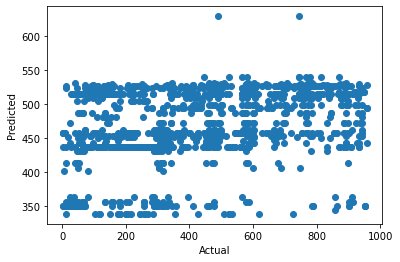

In [134]:
plt.scatter(y_test,ada_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [135]:
mean_absolute_error(y_test,ada_pred)

212.36378010503984

In [136]:
mean_squared_error(y_test,ada_pred)

63739.29661928236

In [137]:
np.sqrt(mean_squared_error(y_test,ada_pred))

252.46642671706343

In [138]:
# these are errors measured by different metrics

In [139]:
# hyperparameter tuning for Ada Booost Regressor

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
params = {'n_estimators':[40,50,60,70],'learning_rate':[0.25,0.30,0.35,0.40]}

In [142]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [143]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.35, 0.4],
                                        'n_estimators': [40, 50, 60, 70]})

In [144]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.35, n_estimators=60)

In [145]:
Ada = AdaBoostRegressor(learning_rate=0.25,n_estimators=50)

Ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.25)

In [146]:
Ada_pred = Ada.predict(x_test)

In [147]:
Ada.score(x_train,y_train)

0.15063215700688282

In [148]:
Ada.score(x_test,y_test)

0.1154814278656704

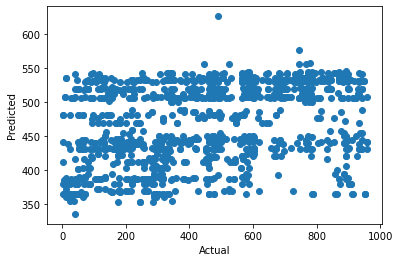

In [149]:
plt.scatter(y_test,Ada_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [150]:
# after hyperparameter tuning it is giving the same output

In [151]:
# hyperparameter tuning for Random Forest 

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = {'n_estimators':[10,20],'max_depth':[10,20],'max_features':[5,10],'bootstrap':[True,False]}

In [154]:
grd_srch = GridSearchCV(RandomForestRegressor(),param_grid,cv=10)

In [155]:
grd_srch.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': [5, 10], 'n_estimators': [10, 20]})

In [156]:
grd_srch.best_estimator_

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=20)

In [157]:
Rf = RandomForestRegressor(max_depth=20,max_features=5,n_estimators=20)

Rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features=5, n_estimators=20)

In [158]:
Rf_pred = Rf.predict(x_test)

In [159]:
Rf.score(x_train,y_train)

0.9091549589914395

In [160]:
Rf.score(x_test,y_test)

0.4541365611726297

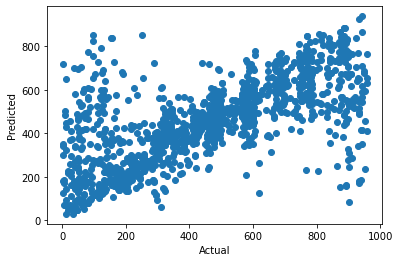

In [161]:
plt.scatter(y_test,Rf_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [162]:
# After hyperparameter tuning this model is giving low accuracy, as it was giving before hyperparameter tuning

In [163]:
# let's consider Random Forest for saving 

In [164]:
# importing pickle for saving the model

In [165]:
import pickle

In [166]:
pickle.dump(rf,open('rf_reg_Car','wb'))